In [1]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

4-element Array{String,1}:
 "@"                                          
 "@v#.#"                                      
 "@stdlib"                                    
 "/home/evelyn/Documentos/Tesis/Programas/IPM"

In [2]:
using ParametrizacionMetodo
using mapeos
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays

┌ Info: Recompiling stale cache file /home/evelyn/.julia/compiled/v1.0/ParametrizacionMetodo.ji for ParametrizacionMetodo [top-level]
└ @ Base loading.jl:1190


First we can make the graphs of phase space make by Haro, de la LLave and Gonzalez.

the definition of the quadratic map 4.2
$$\bar{x} = x + (\bar{y}-a)(\bar{y}-b)\\
\bar{y} = y - \frac{A}{2\pi}\sin(2\pi x)$$

In [3]:
function quadraticSM2(x,y,A,a,b)
    """Es una función que define una familia de mapeos cuadráticos, que 
        provienen de la modificación del mapeo estándar.
        Recibe:x,y,A donde A es un parámetro. 
    """
    y_n = y - (A/(2*pi))*sin(2*pi*x)
    x_n = mod(x + (y_n-a)*(y_n-b),1)
    return [x_n,y_n]
    
end

quadraticSM2 (generic function with 1 method)

Function for iterate.

In [4]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo
    
    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #
    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales
    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)
        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])
        x = F[1]
        y = F[2]
    end
    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del
    
end

function GraficarMap(f)
    n = 40
    s = 10/250
    i=0.
    for x_i=-1:s:1
        for y_i = -pi:s:pi
            i=i+1
            p_ini=[x_i,y_i]
            a,b = IterarMap(f,p_ini,n)
            p = scatter(a[2:40],b[2:40],marker=".",s=0.1,color="gray")
            xlim(0,1)
            ylim(-0.3,0.3)

        end
    end

end

GraficarMap (generic function with 1 method)

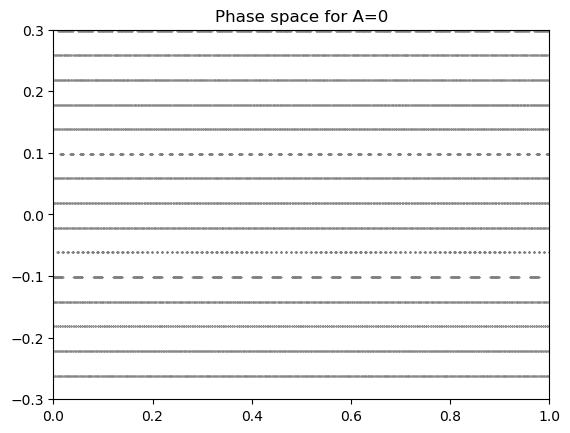

 26.716212 seconds (8.73 M allocations: 351.498 MiB, 0.53% gc time)


PyObject Text(0.5,1,'Phase space for A=0')

In [5]:
A = 0.0
f1(x,y) = quadraticSM2(x,y,A,-0.1,0.2)
@time GraficarMap(f1)
title("Phase space for A=0")


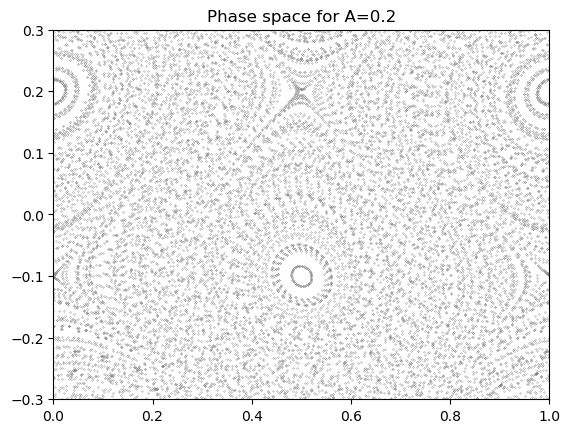

 25.126281 seconds (4.82 M allocations: 155.672 MiB, 0.22% gc time)


PyObject Text(0.5,1,'Phase space for A=0.2')

In [6]:
A = 0.2
f2(x,y) = quadraticSM2(x,y,A,-0.1,0.2)
@time GraficarMap(f2)
title("Phase space for A=0.2")


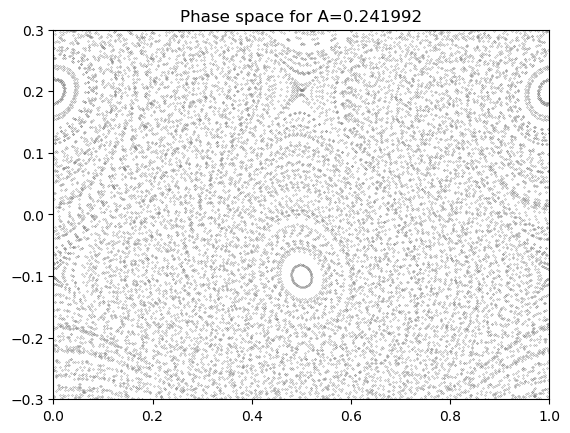

 34.568777 seconds (4.82 M allocations: 155.649 MiB, 0.18% gc time)


PyObject Text(0.5,1,'Phase space for A=0.241992')

In [7]:
A = 0.241992
f3(x,y) = quadraticSM2(x,y,A,-0.1,0.2)
@time GraficarMap(f3)
title("Phase space for A=0.241992")



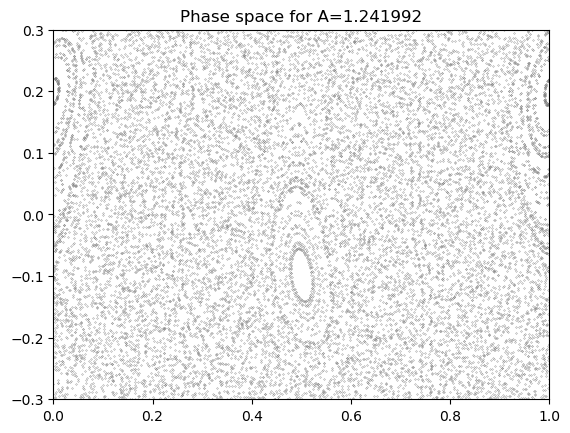

 28.752628 seconds (4.82 M allocations: 155.760 MiB, 0.22% gc time)


PyObject Text(0.5,1,'Phase space for A=1.241992')

In [8]:
A = 1.241992
f4(x,y) = quadraticSM2(x,y,A,-0.1,0.2)
@time GraficarMap(f4)
title("Phase space for A=1.241992")


Only for some combinations of $\alpha$ and $A$ exist hyperbolic fixed points. 

In [9]:
#function for evaluate the parameterization
function EvaluarP(Tiempo, paso, Pol, PuntoFijo, col)
    ValX = Float64[]
    ValY = Float64[]

    push!(ValX, mod(PuntoFijo[1],1))
    push!(ValY, PuntoFijo[2])
    for t = Tiempo[1]:paso:Tiempo[2]

        x = Float64(Pol[1](t))
        y = Float64(Pol[2](t))

        push!(ValX,mod(x,1))
        push!(ValY,y)

    end

    p = plot(ValX,ValY,linestyle = "None",marker = ",",color=col)



    title("Phase space")
    xlabel(L"$x$")
    ylabel(L"$y$")
    #xlim(0,1)
    #ylim(0.2,0.99)


end
function GraficarEst(Tiempo,paso,f,Pol,PuntoFijo,col)
    GraficarMap(f)
    EvaluarP(Tiempo,paso,Pol,PuntoFijo,col)

end






GraficarEst (generic function with 1 method)

First parameterization.

In [10]:
A = 3.5
F1(x,y) = quadraticSM2(x,y,A,-0.1,0.2)

Orden1 = 50 #order of polynomial
p_fijo_a = [0.,-0.1]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
Ws_1a,Es_1a,eigvec_s_1a,eigval_s_1a = Estable(F1, Orden1, p_fijo_a, t_1, delta_t_1);
Wu_1a,Eu_1a,eigvec_u_1a,eigval_u_1a = Inestable(F1, Orden1, p_fijo_a, t_1, delta_t_1);

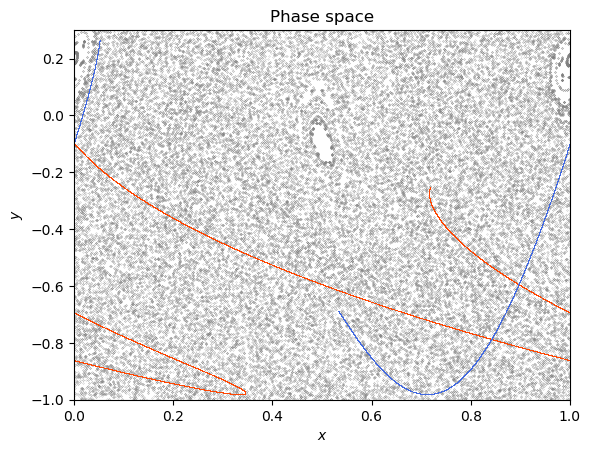

(-1.0, 0.3)

In [11]:
GraficarMap(F1)
EvaluarP([0.0,1.3],0.0001,Ws_1a,[0.,-0.1],"orangered")
EvaluarP([-1.0,0.6],0.0001,Wu_1a,[0.,-0.1],"royalblue")
xlim(0,1)
ylim(-1.0,0.3)

In [12]:
delta_t_1 = 1e-3
ErrorS1a = CalculoError(F1, Ws_1a,Es_1a,[-2.,2.0],delta_t_1);
ErrorU1a = CalculoError(F1, Wu_1a,Eu_1a,[-1.3,1.3],delta_t_1);

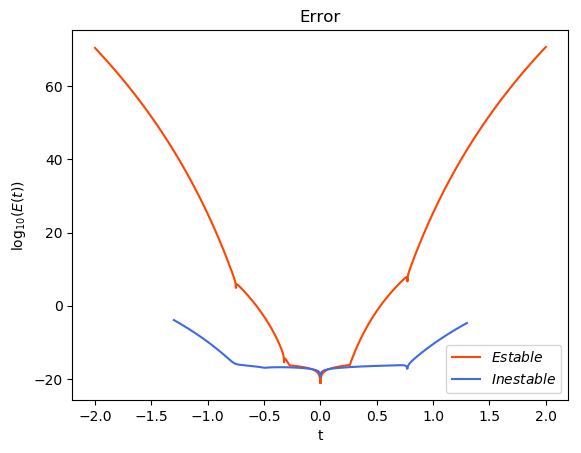

PyObject <matplotlib.legend.Legend object at 0x7fd5560c7710>

In [13]:
plot(ErrorS1a[1],log10.(ErrorS1a[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1a[1],log10.(ErrorU1a[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Convergency.

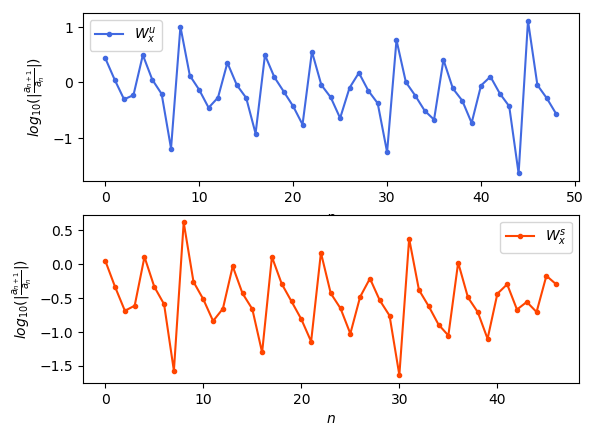

PyObject <matplotlib.legend.Legend object at 0x7fd556001be0>

In [14]:

ConverS_1a=Convergencia(Ws_1a[1],Ws_1a[2])#Hadamard
ConverU_1a=Convergencia(Wu_1a[1],Wu_1a[2])


Cs1a=[log10(abs(ConverS_1a[1][i])) for i in 1:length(ConverS_1a[1])]
Cu1a=[log10(abs(ConverU_1a[1][i])) for i in 1:length(ConverU_1a[1])]

subplot(2,1,1)
plot(Cs1a,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1a,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Second parameterization.

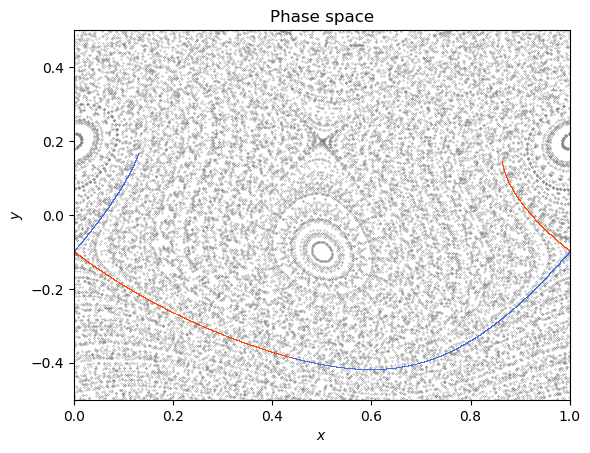

(0, 1.0)

In [42]:
A = .5
F2(x,y) = quadraticSM2(x,y,A,-0.1,0.2)

Orden1 = 90 #order of polynomial
p_fijo_b = [0.,-0.1]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
Ws_1b,Es_1b,eigvec_s_1b,eigval_s_1b = Estable(F2, Orden1, p_fijo_b, t_1, delta_t_1);
Wu_1b,Eu_1b,eigvec_u_1b,eigval_u_1b = Inestable(F2, Orden1, p_fijo_b, t_1, delta_t_1);

GraficarMap(F2)
EvaluarP([-0.5,0.5],0.0001,Ws_1b,[0.,-0.1],"orangered")
EvaluarP([-0.6,0.5],0.0001,Wu_1b,[0.,-0.1],"royalblue")
ylim(-0.5,0.5)
xlim(0,1.)


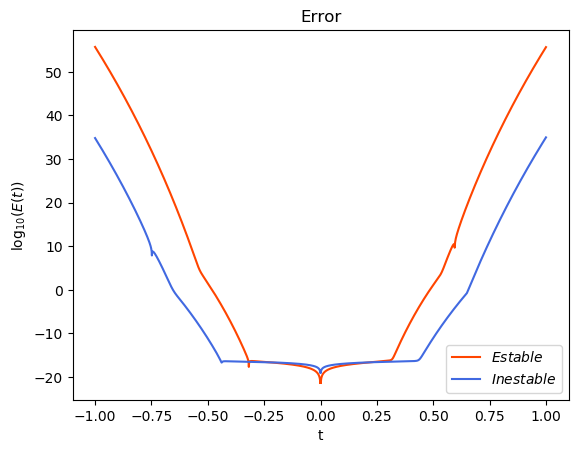

PyObject <matplotlib.legend.Legend object at 0x7fd557038eb8>

In [31]:
delta_t_1 = 1e-3
ErrorS1b = CalculoError(F2, Ws_1b,Es_1b,[-1.0,1.0],delta_t_1);
ErrorU1b = CalculoError(F2, Wu_1b,Eu_1b,[-1.0,1.0],delta_t_1);

plot(ErrorS1b[1],log10.(ErrorS1b[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1b[1],log10.(ErrorU1b[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

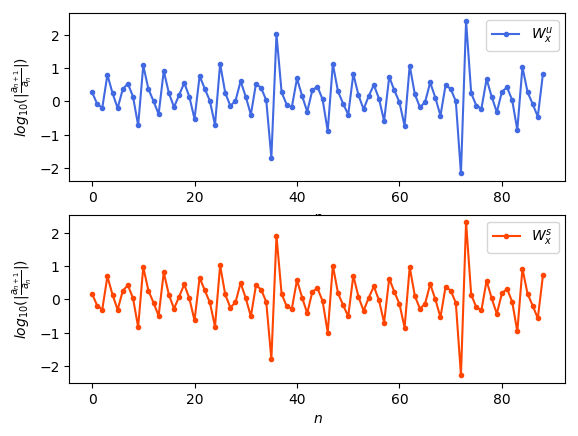

PyObject <matplotlib.legend.Legend object at 0x7fd555b7eeb8>

In [36]:
ConverS_1b=Convergencia(Ws_1b[1],Ws_1b[2])#Hadamard
ConverU_1b=Convergencia(Wu_1b[1],Wu_1b[2])


Cs1b=[log10(abs(ConverS_1b[1][i])) for i in 1:length(ConverS_1b[1])]
Cu1b=[log10(abs(ConverU_1b[1][i])) for i in 1:length(ConverU_1b[1])]

subplot(2,1,1)
plot(Cs1b,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1b,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Another parameterization.

 50.847729 seconds (900.49 M allocations: 47.013 GiB, 34.13% gc time)
 

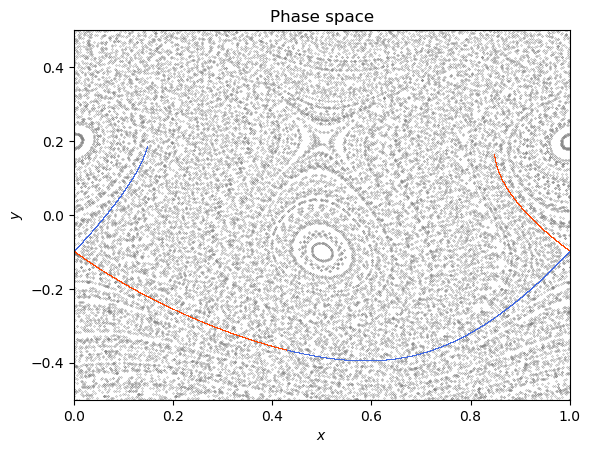

53.016952 seconds (900.26 M allocations: 47.002 GiB, 34.32% gc time)


(0, 1.0)

In [54]:
A = 0.42
F3(x,y) = quadraticSM2(x,y,A,-0.1,0.2)

Orden1 = 290 #order of polynomial
p_fijo_c = [0.,-0.1]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
@time Ws_1c,Es_1c,eigvec_s_1c,eigval_s_1c = Estable(F3, Orden1, p_fijo_c, t_1, delta_t_1);
@time Wu_1c,Eu_1c,eigvec_u_1c,eigval_u_1c = Inestable(F3, Orden1, p_fijo_c, t_1, delta_t_1);

GraficarMap(F3)
EvaluarP([-0.6,0.6],0.0001,Ws_1c,[0.,-0.1],"orangered")
EvaluarP([-0.6,0.6],0.0001,Wu_1c,[0.,-0.1],"royalblue")
ylim(-0.5,0.5)
xlim(0,1.)


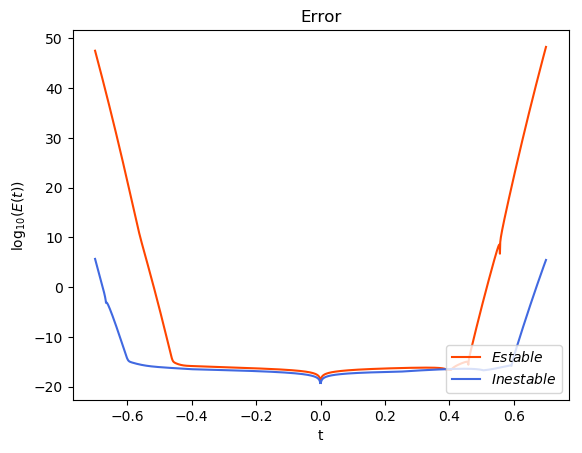

PyObject <matplotlib.legend.Legend object at 0x7fd551707b38>

In [52]:
delta_t_1 = 1e-3
ErrorS1c = CalculoError(F3, Ws_1c,Es_1c,[-0.7,0.7],delta_t_1);
ErrorU1c = CalculoError(F3, Wu_1c,Eu_1c,[-0.7,0.7],delta_t_1);

plot(ErrorS1c[1],log10.(ErrorS1c[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1c[1],log10.(ErrorU1c[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

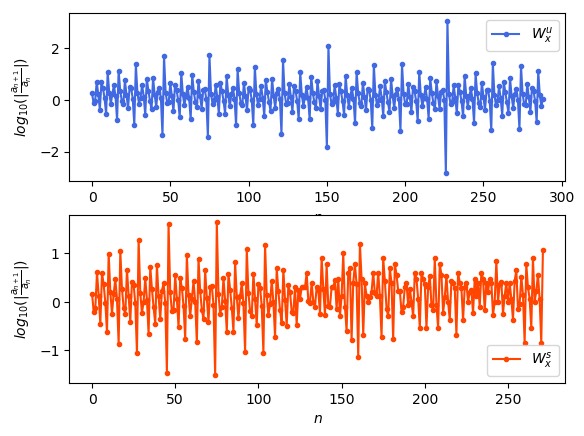

PyObject <matplotlib.legend.Legend object at 0x7fd5520328d0>

In [53]:
ConverS_1c=Convergencia(Ws_1c[1],Ws_1c[2])#Hadamard
ConverU_1c=Convergencia(Wu_1c[1],Wu_1c[2])


Cs1c=[log10(abs(ConverS_1c[1][i])) for i in 1:length(ConverS_1c[1])]
Cu1c=[log10(abs(ConverU_1c[1][i])) for i in 1:length(ConverU_1c[1])]

subplot(2,1,1)
plot(Cs1c,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1c,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

####  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

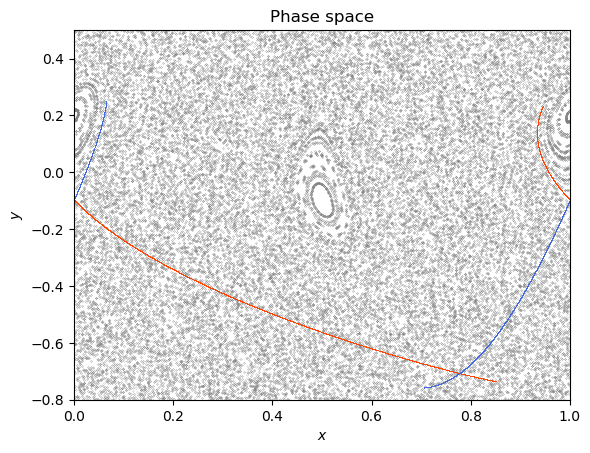

(0, 1.0)

In [61]:
A = 2.2
F4(x,y) = quadraticSM2(x,y,A,-0.1,0.2)

Orden1 = 70 #order of polynomial
p_fijo_c = [0.,-0.1]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
Ws_1d,Es_1d,eigvec_s_1d,eigval_s_1d = Estable(F4, Orden1, p_fijo_c, t_1, delta_t_1);
Wu_1d,Eu_1d,eigvec_u_1d,eigval_u_1d = Inestable(F4, Orden1, p_fijo_c, t_1, delta_t_1);

GraficarMap(F4)
EvaluarP([-0.6,0.6],0.0001,Ws_1d,p_fijo_c,"orangered")
EvaluarP([-0.6,0.6],0.0001,Wu_1d,p_fijo_c,"royalblue")
ylim(-0.8,0.5)
xlim(0,1.)


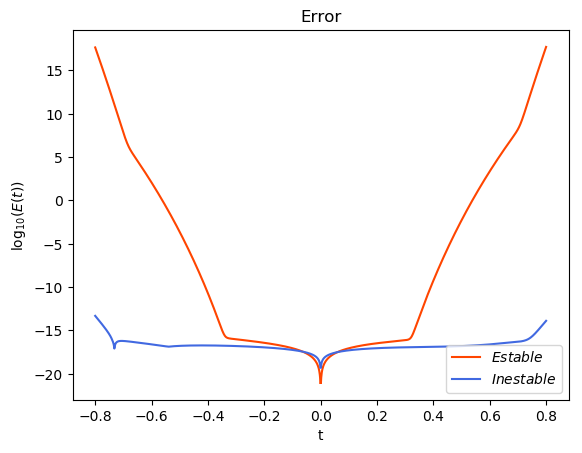

PyObject <matplotlib.legend.Legend object at 0x7fd552f78588>

In [62]:
delta_t_1 = 1e-3
ErrorS1d = CalculoError(F4, Ws_1d,Es_1d,[-0.8,0.8],delta_t_1);
ErrorU1d = CalculoError(F4, Wu_1d,Eu_1d,[-0.8,0.8],delta_t_1);

plot(ErrorS1d[1],log10.(ErrorS1d[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1d[1],log10.(ErrorU1d[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

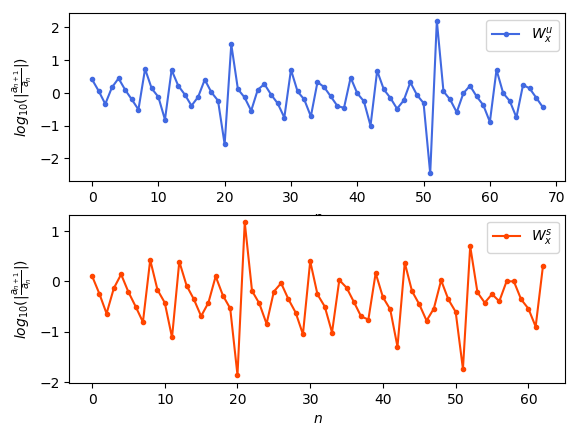

PyObject <matplotlib.legend.Legend object at 0x7fd554213978>

In [63]:
ConverS_1d=Convergencia(Ws_1d[1],Ws_1d[2])#Hadamard
ConverU_1d=Convergencia(Wu_1d[1],Wu_1d[2])


Cs1d=[log10(abs(ConverS_1d[1][i])) for i in 1:length(ConverS_1d[1])]
Cu1d=[log10(abs(ConverU_1d[1][i])) for i in 1:length(ConverU_1d[1])]

subplot(2,1,1)
plot(Cs1d,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1d,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

## Intersections

In [53]:
function Interseccion(p,Ws,Wu)
    (x,y) = p
    V= SVector( Ws[1](x)-Wu[1](y), Ws[2](x)-Wu[2](y))
#    @show(p, V)
end

Interseccion (generic function with 1 method)

We define a interval for search the intersection.

In [ ]:
X = (0.0..(1.1))×(-0.1..(10.1)) # 2D IntervalBox;

In [ ]:
Intersección(X)

In [ ]:
r = roots(Intersección, X, Newton, 1e-6)

In [ ]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [ ]:
pygui(false)

GraficarEst([0.1,15.4], 0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2],- 0.25, estandar2, Wu_2,[0.,2pi],"royalblue")
colores=["gold","darkorange","seagreen","deepskyblue","violet","reed","dodgerblue"]
for ind in eachindex(r)
    plot(Ws_2[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         Ws_2[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o", color=colores[ind])
end
scatter([0.,0.,2pi,2pi],[0.,2pi,0.,2pi],color="limegreen")